# **Khai báo các thư viện cần dùng**

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

# **Phần I. TIỀN XỬ LÝ DỮ LIỆU**

In [50]:
# Đọc dữ liệu từ file CSV
file_path = '../data/data.csv'  
df = pd.read_csv(file_path)

Hiện thị 5 dòng đầu của dữ liệu

In [51]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN



**Ý nghĩa của 32 thuộc tính trong dữ liệu:**

1. id: Mã định danh của mỗi bệnh nhân hoặc mẫu.
2. diagnosis: Kết quả chẩn đoán, thường sẽ là "M" (Malignant - ác tính) hoặc "B" (Benign - lành tính).
3. radius_mean: Bán kính trung bình của khối u, thường được tính từ chu vi.
4. texture_mean: Độ nhám trung bình trên bề mặt khối u.
5. perimeter_mean: Chu vi trung bình của khối u.
6. area_mean: Diện tích trung bình của khối u.
7. smoothness_mean: Độ nhẵn trung bình của khối u.
8. compactness_mean: Độ chặt trung bình của khối u, tính bằng công thức (chu vi^2 / diện tích - 1.0).
9. concavity_mean: Mức độ lõm trung bình trên bề mặt khối u.
10. concave points_mean: Số điểm lõm trung bình trên bề mặt khối u.
11. symmetry_mean: Độ đối xứng trung bình của khối u.
12. fractal_dimension_mean: Kích thước fractal trung bình của khối u, chỉ số cho thấy mức độ phức tạp của hình dạng.
13. → Các thuộc tính có hậu tố "_se" (như radius_se, texture_se, ...): Sai số chuẩn của các giá trị tương ứng, cho biết mức độ biến thiên của các thuộc tính này.
14. → Các thuộc tính có hậu tố "_worst" (như radius_worst, texture_worst, ...): Giá trị lớn nhất của các thuộc tính tương ứng, biểu thị kích thước hoặc độ nặng nhất của khối u trong các đặc điểm này.

Những thuộc tính này thường được sử dụng để phân tích và chẩn đoán ung thư vú, đặc biệt trong việc phân biệt giữa khối u ác tính và lành tính dựa trên hình thái và các đặc điểm bề mặt của khối u.

Hiển thị kích thước của bảng dữ liệu


In [52]:
df.shape

(569, 33)

Hiển thị thông tin tóm tắt về DataFrame df. Cụ thể cung cấp các thông tin sau:


*   Số hàng và số cột của df
*   Tên cột và loại dữ liệu tương ứng của từng cột
*   Số lượng giá trị không bị thiếu của từng cột
*   Tổng dung lượng bộ nhớ mà df sử dụng





In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Lệnh **df.isna().sum()** trong pandas được sử dụng để kiểm tra số lượng giá trị bị thiếu (NaN - Not a Number) trong mỗi cột của DataFrame df. Cụ thể:

df.isna(): Trả về một DataFrame với các giá

*   **df.isna()**: Trả về một DataFrame với các giá trị boolean, trong đó True chỉ ra giá trị bị thiếu (NaN) và False chỉ ra giá trị không bị thiếu.
*   **sum()**: Tổng hợp số lượng giá trị True (giá trị bị thiếu) trong mỗi cột. Kết quả là một danh sách cho biết số lượng giá trị thiếu trong từng cột của DataFrame.

In [54]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Lệnh **df['diagnosis'].value_counts()** trong pandas được sử dụng để đếm số lượng các giá trị khác nhau trong cột diagnosis của DataFrame df.

Cụ thể, nếu cột diagnosis chứa các giá trị như 'M' (malignant - ác tính) và 'B' (benign - lành tính), lệnh này sẽ trả về số lượng các mẫu tương ứng cho mỗi loại chẩn đoán. Kết quả sẽ là một bảng liệt kê số lượng các giá trị xuất hiện trong cột, giúp bạn hiểu rõ sự phân bố của các nhãn chẩn đoán trong dữ liệu.

In [55]:
print(df['diagnosis'].value_counts())
# tính tỉ lệ phần trăm của biến mục tiêu
# cú pháp df['tên cột'].value_counts(True)
df['diagnosis'].value_counts(True)

diagnosis
B    357
M    212
Name: count, dtype: int64


diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64

### Sử dụng Label Encoding để mã hóa các biến phân loại
Lệnh df['diagnosis'].replace({"B":"0", "M":"1"}, inplace=True) trong pandas được sử dụng để thay thế các giá trị trong cột diagnosis của DataFrame df:
*   "B" (Benign - lành tính) sẽ được thay thế bằng "0".
*   "M" (Malignant - ác tính) sẽ được thay thế bằng "1".
*   Tham số inplace=True đảm bảo rằng các thay đổi sẽ được thực hiện trực tiếp trong DataFrame mà không cần tạo một bản sao mới. Đây là cách chuyển đổi nhãn từ dạng ký tự sang dạng số để dễ xử lý trong các mô hình học máy.

In [56]:
# Mã hóa cột 'diagnosis': B = 0, M = 1
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

Lệnh sns.catplot(x='diagnosis', data=df, kind='count') sử dụng thư viện **Seaborn** để tạo biểu đồ cột (count plot) hiển thị số lượng các giá trị khác nhau trong cột diagnosis của DataFrame df.


*   x='diagnosis': Trục x hiển thị các giá trị của cột diagnosis (ví dụ: 0 và 1 sau khi đã thay thế).
*   data=df: Sử dụng dữ liệu từ DataFrame df.
*   kind='count': Tạo biểu đồ cột, trong đó chiều cao của các cột biểu thị số lượng mỗi loại giá trị trong cột diagnosis.

Biểu đồ này giúp trực quan hóa sự phân bố các nhãn lành tính và ác tính.

Seaborn là một thư viện trực quan hóa dữ liệu được xây dựng trên Matplotlib, cung cấp giao diện dễ sử dụng cho việc tạo các biểu đồ thống kê. Các tính năng chính của Seaborn bao gồm:

*   Biểu đồ phân bố (distribution plots): như distplot, kdeplot để hiển thị phân phối của dữ liệu.
*   Biểu đồ quan hệ (relational plots): như scatterplot, lineplot để biểu diễn mối quan hệ giữa các biến.
*   Biểu đồ phân loại (categorical plots): như barplot, boxplot, catplot để so sánh giữa các nhóm.

Hỗ trợ quản lý màu sắc và các bảng màu để hiển thị dễ hiểu hơn.

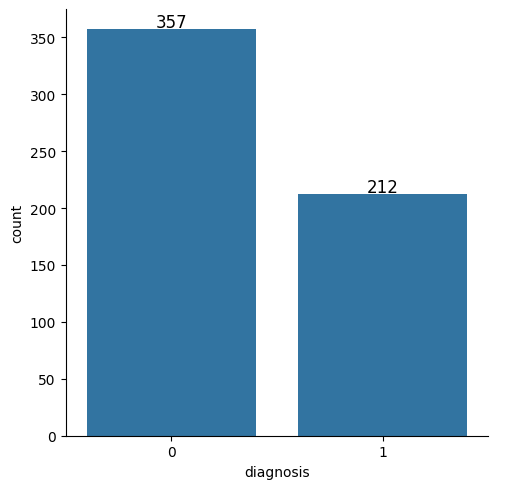

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Tạo catplot
g = sns.catplot(x='diagnosis', data=df, kind='count')

# Lấy trục (axis) của biểu đồ để thêm nhãn
ax = g.ax

# Sửa nhãn trên trục x
#ax.set_xticklabels(['0', '1'])  # Đổi nhãn từ 0.0 thành 0 và 1.0 thành 1

# Chuyển đổi nhãn trên trục x sang dạng số nguyên
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x)}'))  # Chuyển số thực thành số nguyên

# Chèn số lượng vào cột đầu tiên và cột thứ hai
# Lấy các đối tượng cột từ ax.patches
for i, p in enumerate(ax.patches):
    # Lấy số lượng từ chiều cao của cột
    count = int(p.get_height())  # Chuyển đổi số lượng thành số nguyên

    # Chèn số lượng vào cột đầu tiên và thứ hai
    if i == 0:  # Cột đầu tiên
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí nhãn
                    ha='center', va='center',  # Căn chỉnh nhãn
                    fontsize=12, color='black',  # Cài đặt phông chữ và màu sắc
                    xytext=(0, 5), textcoords='offset points')  # Khoảng cách nhãn
    elif i == 1:  # Cột thứ hai
        ax.annotate(f'{count}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),  # Vị trí nhãn
                    ha='center', va='center',  # Căn chỉnh nhãn
                    fontsize=12, color='black',  # Cài đặt phông chữ và màu sắc
                    xytext=(0, 5), textcoords='offset points')  # Khoảng cách nhãn

# Hiển thị biểu đồ
plt.show()

Lệnh df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True) trong pandas được sử dụng để xóa hai cột 'id' và 'Unnamed: 32' ra khỏi DataFrame df.


*   axis=1: Chỉ định rằng bạn đang xóa cột (nếu axis=0, bạn sẽ xóa hàng).
*   inplace=True: Thực hiện thay đổi trực tiếp trên DataFrame df mà không cần tạo một bản sao mới.

Lệnh này thường được dùng để loại bỏ những cột không cần thiết hoặc không có giá trị phân tích.

Cột Unnamed: 32 thường xuất hiện trong dữ liệu khi có một cột thừa hoặc không được đặt tên, ví dụ, do lỗi khi nhập dữ liệu từ file CSV. Nó có thể là một cột trống hoặc chứa các giá trị không cần thiết. Trong trường hợp này, lệnh df.drop(['Unnamed: 32'], axis=1) được sử dụng để loại bỏ cột này nhằm làm sạch dữ liệu trước khi tiến hành các phân tích hoặc mô hình hóa.


In [58]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

In dữ liệu sau khi làm sạch

In [59]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# **PHẦN 2: PHÂN TÍCH VÀ TRỰC QUAN HÓA DỮ LIỆU**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

## **1. Tách đầu vào và đầu ra**

*   Loại bỏ diagnosis khỏi df
*   axit = 1 --> xóa cột
*   Phần còn lại của df <-- X: các biến đầu vào để dự đoán đầu ra y là diagnosis

In [61]:
# Tách đầu vào và đầu ra
# Giả sử chúng ta phân loại ung thư (lành tính/ác tính) dựa trên diagnosis
X = df.drop(['diagnosis'], axis=1)  # Loại bỏ diagnosis là biến mục tiêu
y = df['diagnosis']

Chia dữ liệu thành tập huấn luyện (training set) và tập kiểm tra (test set)

train_test_split: Đây là hàm từ thư viện scikit-learn, được sử dụng để chia tập dữ liệu thành hai phần: tập huấn luyện và tập kiểm tra.

test_size=0.3:
*   test_size chỉ định tỷ lệ dữ liệu sẽ được dùng làm tập kiểm tra.
*   Ở đây, test_size=0.3 có nghĩa là 30% dữ liệu sẽ được sử dụng cho tập kiểm tra, và 80% dữ liệu còn lại sẽ được dùng cho tập huấn luyện.

random_state=42:
*   random_state là một tham số được sử dụng để đảm bảo tính tái lập (reproducibility).
*   Khi ta thiết lập random_state=42, việc chia dữ liệu sẽ luôn tạo ra cùng một kết quả mỗi khi bạn chạy mã, đảm bảo kết quả là nhất quán khi bạn thử lại.
*   Giá trị 42 không có ý nghĩa đặc biệt, nó chỉ là một số được dùng làm hạt ngẫu nhiên (random seed).

stratify=y:
*   Tác dụng của nó là chia đều tỉ lệ cho cả các mẫu dữ liệu nhãn M và nhãn B.

Kết quả của train_test_split: Hàm này trả về bốn biến:

*   X_train: Tập đặc trưng huấn luyện, chứa 70% của X: gồm 70% mẫu dữ liệu của nhãn M, 70% mẫu dữ liệu của nhãn B.
*   X_test: Tập đặc trưng kiểm tra, chứa 30% của X: gồm 30% mẫu dữ liệu của nhãn M, 30% mẫu dữ liệu của nhãn B.
*   y_train: Tập nhãn huấn luyện, chứa 70% của y: là nhãn của X_train, tỷ lệ như trên.
*   y_test: Tập nhãn kiểm tra, chứa 30% của y.

In [62]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **2. Phân tích thành phần chính PCA**

## a. Chuẩn hóa dữ liệu

Đoạn mã này sử dụng StandardScaler từ thư viện scikit-learn để chuẩn hóa dữ liệu. Việc chuẩn hóa là một bước rất quan trọng trong quy trình học máy, đặc biệt là đối với các mô hình nhạy cảm với sự khác biệt về đơn vị đo của các đặc trưng (như SVM, KNN, Logistic Regression,...).

StandardScaler: Đây là một công cụ trong scikit-learn dùng để chuẩn hóa các đặc trưng của dữ liệu bằng cách tạo ra dữ liệu có phân phối chuẩn (normal distribution) với:

*   Mean (trung bình) = 0.
*   Standard Deviation (độ lệch chuẩn) = 1.

**Công thức chuẩn hóa**

Xét lần lượt từng cột thuộc tính, với mỗi giá trị \( x \) thì ta chuẩn hóa thành $ x_{\text{scaled}} $ như sau:



$$
x_{\text{scaled}} = \frac{x - \mu}{\sigma}
$$

Trong đó:
- \( x \) là giá trị của dữ liệu.
- \( N \) là số mẫu dữ liệu, ở đây cụ thể bằng 569.
- \( mu \) là giá trị trung bình của đặc trưng, được tính như sau:

$$
\mu = \frac{x_1 + x_2 + x_3 + \cdots + x_N}{N}
$$

- \( sigma \) là độ lệch chuẩn của đặc trưng, được tính như sau:

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

In [63]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Thực hiện giảm chiều bằng PCA

pca = PCA()
*   PCA(): Đây là cách khởi tạo một đối tượng của lớp PCA từ thư viện scikit-learn.
*   Khi khởi tạo PCA mà không truyền thêm tham số, PCA sẽ giữ lại tất cả các thành phần chính của dữ liệu.

fit_transform(): Đây là một phương thức kết hợp hai bước trong quá trình PCA:


*   fit(): Phương thức này học các thành phần chính từ bộ dữ liệu huấn luyện (X_train_scaled). Nó sẽ tính toán ma trận hiệp phương sai của dữ liệu và tìm các thành phần chính.
*   transform(): Sau khi đã "học" xong các thành phần chính, phương thức transform() sẽ chiếu dữ liệu gốc vào không gian mới được tạo ra bởi các thành phần chính.


In [64]:
# Thực hiện PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

## Phân tích phương sai giải thích
**pca.explained_variance_ratio_:**
*   Đây là thuộc tính của đối tượng PCA sau khi đã thực hiện fit() trên dữ liệu. Nó trả về tỷ lệ phương sai giải thích của mỗi thành phần chính.
*   Phương sai giải thích cho biết mức độ quan trọng của mỗi thành phần chính trong việc giải thích sự biến thiên trong dữ liệu.

Kết quả explained_variance là một mảng chứa tỷ lệ phương sai giải thích của từng thành phần chính.

**np.cumsum()**: Đây là hàm trong thư viện NumPy tính tổng dồn của một mảng. Cộng dồn các giá trị của **explained_variance** để tính tổng phương sai giải thích của tất cả các thành phần chính đến một thành phần chính cụ thể.

**cumulative_variance:** Kết quả là một mảng chứa tổng phương sai giải thích tích lũy của các thành phần chính.

In [65]:
# Phân tích phương sai giải thích
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

## Vẽ biểu đồ phương sai giải thích PCA.
Biểu đồ này sẽ giúp bạn hiểu được mức độ đóng góp của các thành phần chính trong PCA vào phương sai tổng thể, với một ngưỡng được chỉ ra để xác định số lượng thành phần chính cần thiết để giải thích ít nhất 95% phương sai của dữ liệu.

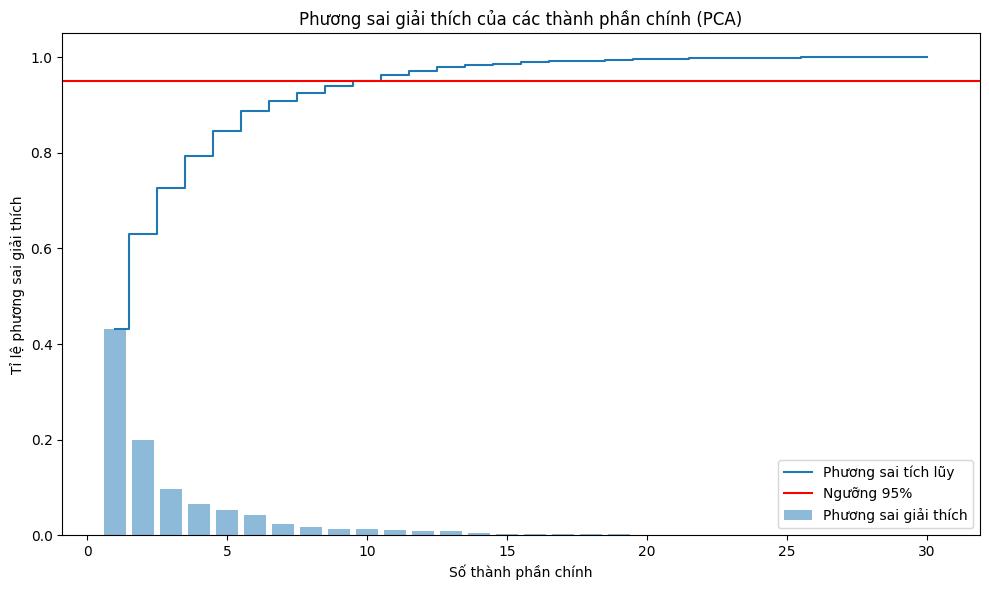

In [66]:
# Vẽ đồ thị phương sai giải thích
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center',
        label='Phương sai giải thích')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid',
         label='Phương sai tích lũy')
plt.axhline(y=0.95, color='r', linestyle='-', label='Ngưỡng 95%')
plt.xlabel('Số thành phần chính')
plt.ylabel('Tỉ lệ phương sai giải thích')
plt.title('Phương sai giải thích của các thành phần chính (PCA)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig('../results/figures/pca_explained_variance.png')

## Xác định số thành phần chính cần để giữ 95% phương sai
cumulative_variance >= 0.95:

*   cumulative_variance là mảng chứa phương sai tích lũy của các thành phần chính (được tính bằng cách cộng dồn explained_variance).
*   Câu lệnh này kiểm tra điều kiện, trả về một mảng boolean (True/False), nơi mỗi giá trị tương ứng với việc liệu phương sai tích lũy ở đó có lớn hơn hoặc bằng 95% hay không.

np.argmax()

*   np.argmax() trả về chỉ số (index) của phần tử đầu tiên có giá trị True trong mảng boolean được tạo ra từ điều kiện cumulative_variance >= 0.95.
*   Cộng 1 do np.argmax() trả về chỉ số bắt đầu từ 0, nhưng trong PCA, số thành phần chính bắt đầu từ 1


In [67]:
# Xác định số thành phần chính cần để giữ 95% phương sai
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Số thành phần chính cần để giữ 95% phương sai: {n_components_95}")

Số thành phần chính cần để giữ 95% phương sai: 10


In [68]:
# Áp dụng PCA với số thành phần được chọn
pca_95 = PCA(n_components=n_components_95)
X_train_pca_95 = pca_95.fit_transform(X_train_scaled)
X_test_pca_95 = pca_95.transform(X_test_scaled)


## Trực quan hóa dữ liệu PCA
Trực quan hóa dữ liệu sau khi áp dụng PCA bằng cách vẽ biểu đồ phân tán cho hai thành phần chính đầu tiên. Việc này giúp hình dung sự phân bố và mối quan hệ giữa các mẫu dữ liệu trong không gian giảm chiều.

Màu sắc của các điểm dựa trên nhãn lớp (y_train) giúp ta thấy rõ sự phân tách giữa các nhóm dữ liệu khác nhau, từ đó dễ dàng đánh giá liệu dữ liệu có thể được phân loại rõ ràng hay không trong không gian giảm chiều.

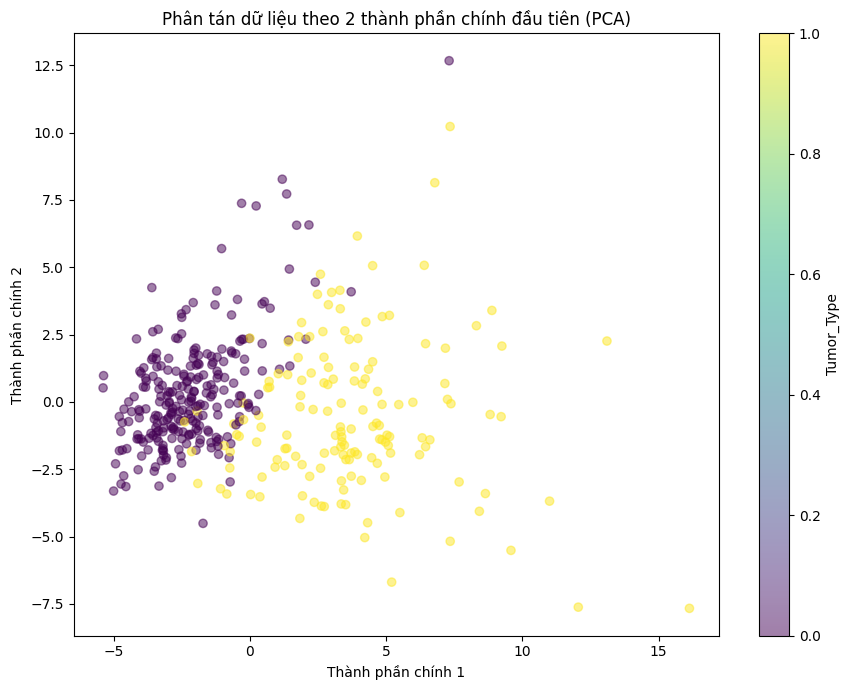

In [69]:
# Trực quan hóa dữ liệu PCA
# Vẽ biểu đồ phân tán cho 2 thành phần chính đầu tiên
plt.figure(figsize=(9, 7))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Tumor_Type')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.title('Phân tán dữ liệu theo 2 thành phần chính đầu tiên (PCA)')
plt.tight_layout()
plt.savefig('../results/figures/pca_scatter_plot.png')

## **3. Phân tích phân biệt tuyến tính LDA**

### Thực hiện LDA
Đoạn mã này thực hiện giảm chiều dữ liệu bằng phương pháp Linear Discriminant Analysis (LDA). Mục đích của LDA là giảm số lượng đặc trưng (features) trong dữ liệu trong khi vẫn giữ được khả năng phân biệt giữa các lớp dữ liệu.

1.   Xác định số lớp trong tập huấn luyện: np.unique(y_train) trả về các giá trị duy nhất trong y_train, và len() trả về số lượng các lớp khác nhau.
2.   Xác định số thành phần cần giữ lại: Số lượng thành phần (components) trong LDA bị giới hạn bởi số lớp - 1 và số lượng đặc trưng trong dữ liệu. Nếu số lượng lớp ít hơn số đặc trưng, số thành phần được chọn sẽ là số lớp - 1. Ngược lại, nếu số lớp nhiều hơn số đặc trưng, số thành phần chỉ có thể tối đa bằng số đặc trưng.
3.   Khởi tạo mô hình LDA: Dùng thư viện sklearn để tạo một mô hình LDA, và chỉ định số thành phần (số chiều giảm xuống).
4.   Áp dụng phương pháp LDA vào tập huấn luyện.
5.   Giảm chiều dữ liệu kiểm tra



In [70]:
# Thực hiện LDA
n_classes = len(np.unique(y_train))
n_components_lda = min(n_classes - 1, X_train_scaled.shape[1])
lda = LDA(n_components=n_components_lda)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

### Trực quan hóa dữ liệu LDA
Vẽ đồ thị phân tán cho dữ liệu đã được giảm chiều bằng phương pháp LDA, sử dụng thành phần LDA đầu tiên. Các điểm dữ liệu được tô màu theo nhãn lớp ("diagnosis") để thể hiện sự phân biệt giữa các lớp. Trục y bị ẩn vì không có giá trị thay đổi, và chỉ có một thành phần LDA được hiển thị trên trục x.

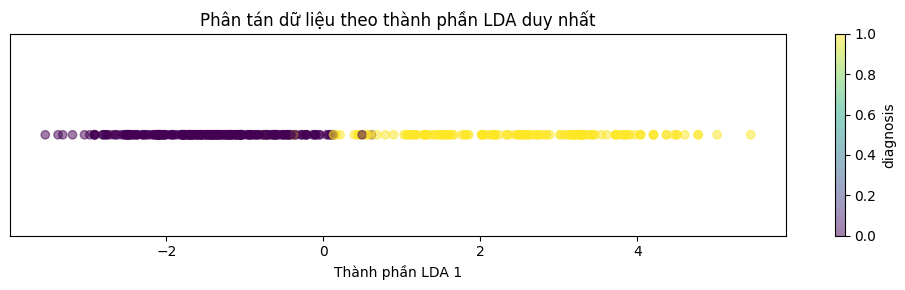

In [71]:
# Trực quan hóa dữ liệu LDA
plt.figure(figsize=(10, 3))
plt.scatter(X_train_lda[:, 0], [0]*len(X_train_lda), c=y_train, cmap='viridis', alpha=0.5)
plt.colorbar(label='diagnosis')
plt.xlabel('Thành phần LDA 1')
plt.yticks([])  # Ẩn trục y vì không cần thiết
plt.title('Phân tán dữ liệu theo thành phần LDA duy nhất')
plt.tight_layout()
plt.show()


## **4. So sánh và đánh giá**

In [72]:
# 4.1 Đánh giá phương sai giải thích trên tập kiểm tra
X_test_reconstructed_pca = np.dot(X_test_pca_95, pca_95.components_) + scaler.mean_
pca_variance_score = explained_variance_score(X_test_scaled, X_test_reconstructed_pca)

print("\nSo sánh PCA và LDA:")
print(f"Phương sai giải thích của PCA trên tập kiểm tra: {pca_variance_score:.4f}")
print(f"Số thành phần được sử dụng trong PCA: {n_components_95}")
print(f"Số thành phần được sử dụng trong LDA: {n_components_lda}")


So sánh PCA và LDA:
Phương sai giải thích của PCA trên tập kiểm tra: 0.9449
Số thành phần được sử dụng trong PCA: 10
Số thành phần được sử dụng trong LDA: 1


In [73]:
# 4.2 Lưu dữ liệu đã giảm chiều
np.save('../data/dimensionality-reduced-data/X_train_pca.npy', X_train_pca_95)
np.save('../data/dimensionality-reduced-data/X_test_pca.npy', X_test_pca_95)
np.save('../data/dimensionality-reduced-data/X_train_lda.npy', X_train_lda)
np.save('../data/dimensionality-reduced-data/X_test_lda.npy', X_test_lda)
np.save('../data/dimensionality-reduced-data/y_train.npy', y_train)
np.save('../data/dimensionality-reduced-data/y_test.npy', y_test)

## **5. Trực quan hóa các thành phần chính quan trọng**

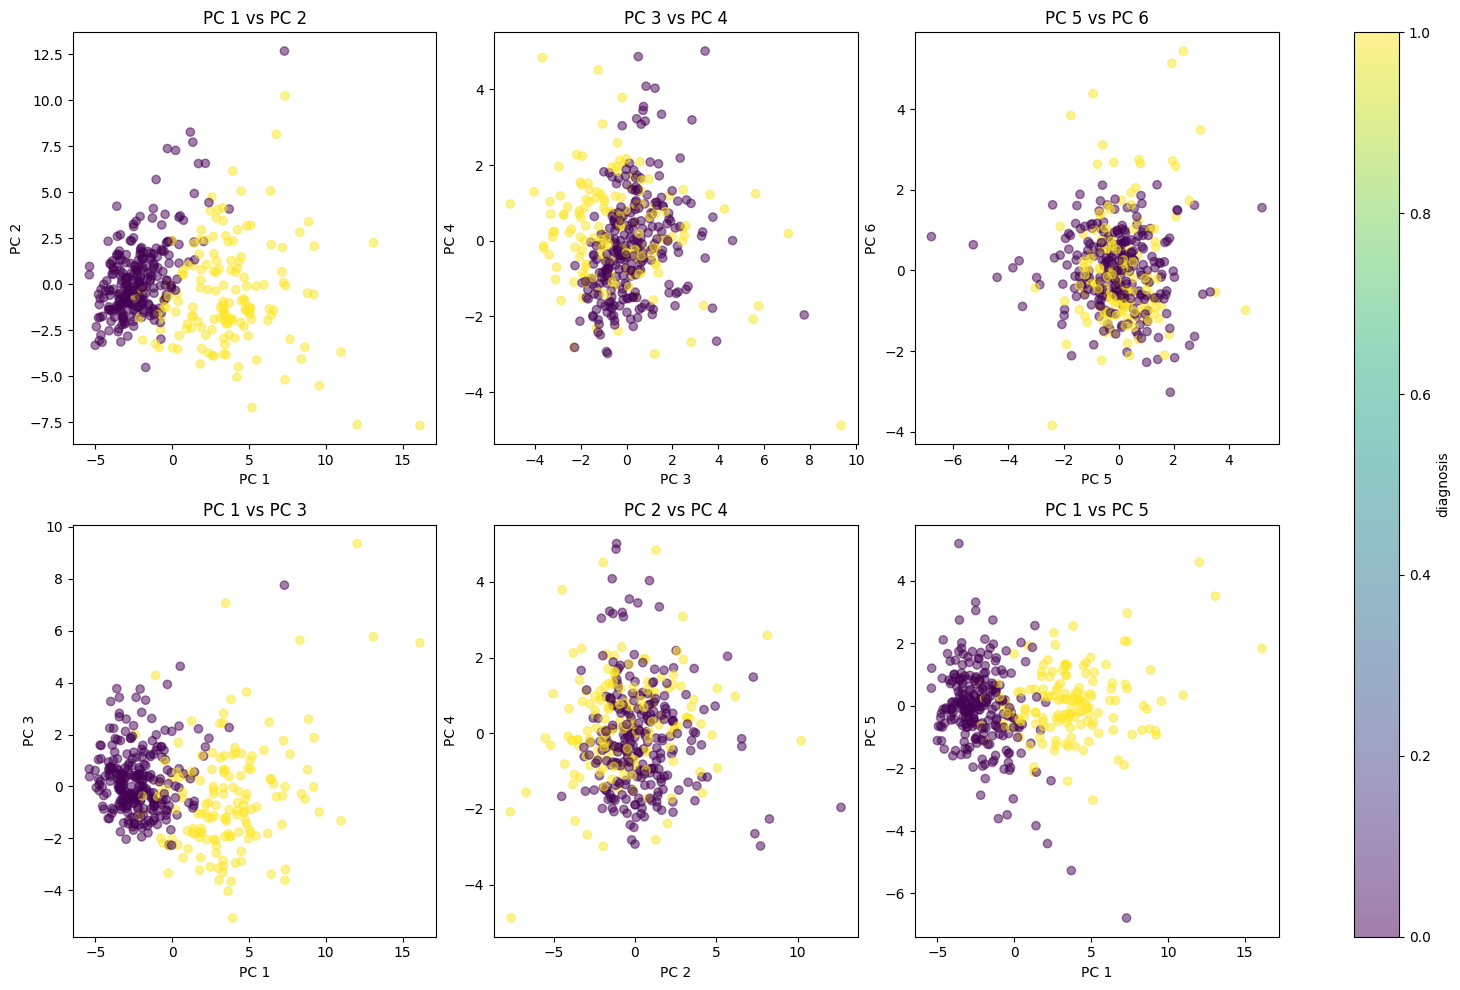

In [74]:
# Trực quan hóa các thành phần chính quan trọng
if n_components_95 >= 6:
    # Vẽ biểu đồ phân tán cho 6 thành phần chính đầu tiên (cặp đôi)
    fig, axes = plt.subplots(2, 3, figsize=(16, 10))
    axes = axes.flatten()

    pairs = [(0, 1), (2, 3), (4, 5), (0, 2), (1, 3), (0, 4)]

    for i, (pc1, pc2) in enumerate(pairs):
        scatter = axes[i].scatter(X_train_pca[:, pc1], X_train_pca[:, pc2], c=y_train, cmap='viridis', alpha=0.5)
        axes[i].set_xlabel(f'PC {pc1+1}')
        axes[i].set_ylabel(f'PC {pc2+1}')
        axes[i].set_title(f'PC {pc1+1} vs PC {pc2+1}')

    plt.tight_layout()
    plt.colorbar(scatter, ax=axes, label='diagnosis')
    plt.savefig('../results/figures/pca_multiple_components.png')


Phân tích và giảm chiều dữ liệu đã hoàn thành!


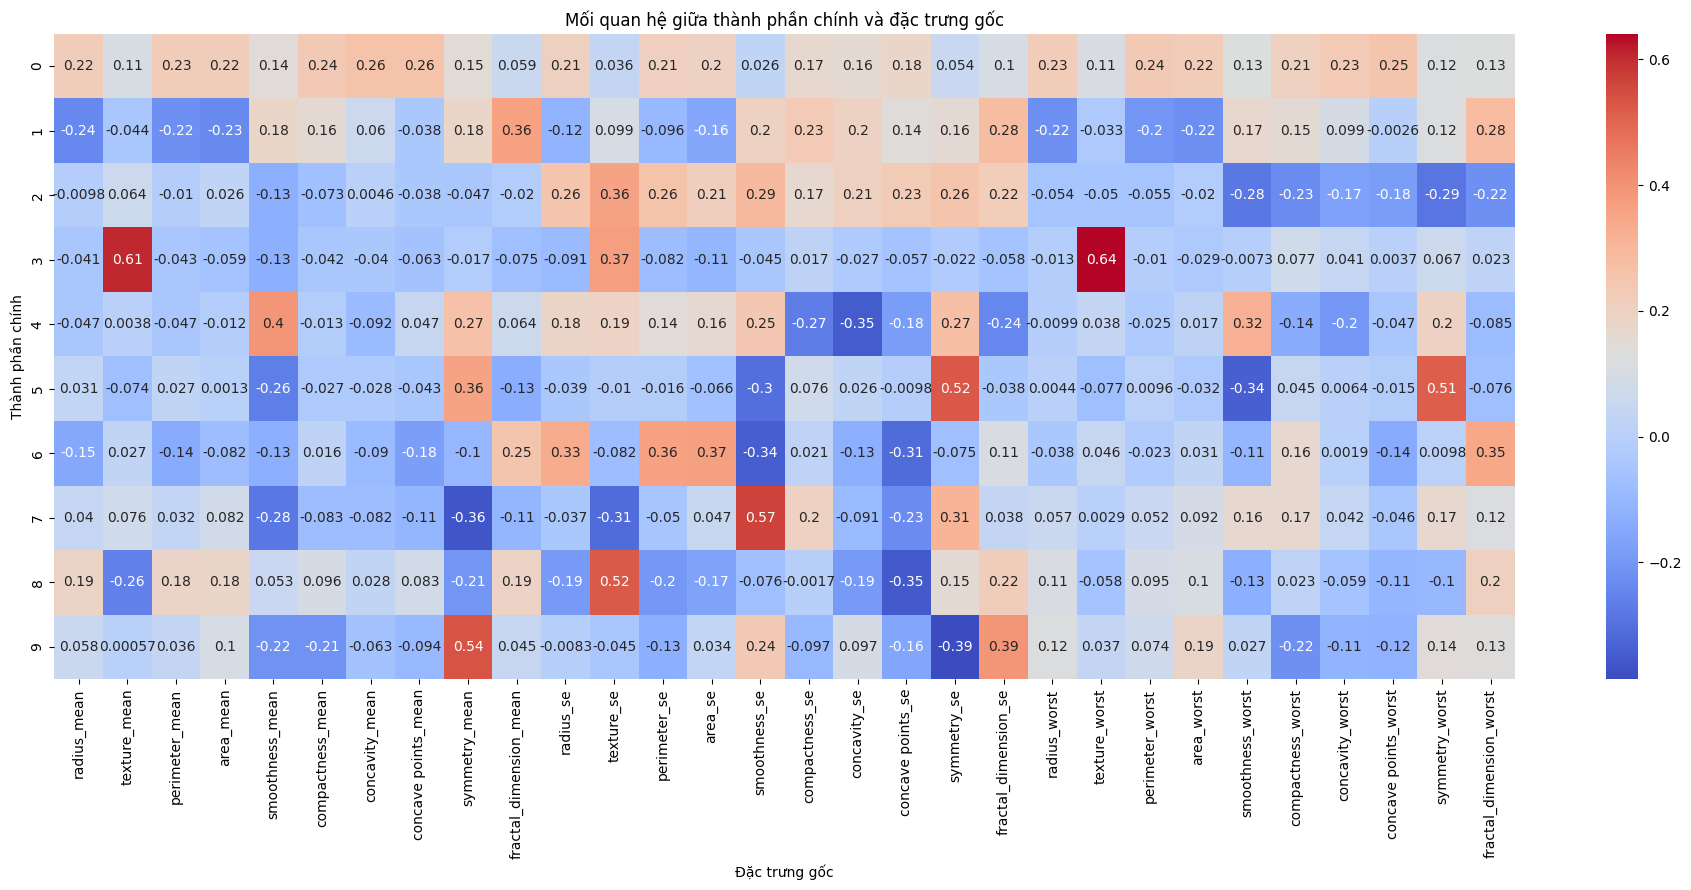

In [75]:
# Phân tích mối quan hệ giữa các thành phần chính và các đặc trưng gốc
pca_components = pd.DataFrame(
    pca.components_,
    columns=X.columns
)

plt.figure(figsize=(19, 9))
sns.heatmap(pca_components.iloc[:n_components_95], annot=True, cmap='coolwarm')
plt.xlabel('Đặc trưng gốc')
plt.ylabel('Thành phần chính')
plt.title('Mối quan hệ giữa thành phần chính và đặc trưng gốc')
plt.tight_layout()
plt.savefig('../results/figures/pca_features_correlation.png')

print("\nPhân tích và giảm chiều dữ liệu đã hoàn thành!")

# **PHẦN 3: Các mô hình phân loại nhị phân**

## 1. K-nearest neighbors - KNN

Mô hình KNN dự đoán xem một khối u là lành tính (Benign, nhãn 0) hay ác tính (Malignant, nhãn 1)

In [76]:
# Thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score

import warnings
warnings.filterwarnings('ignore')

In [77]:
# Hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Vẽ ma trận nhầm lẫn sử dụng seaborn heatmap.

    Parameters:
    - y_true: Nhãn thực tế.
    - y_pred: Nhãn dự đoán.
    - title: Tiêu đề của biểu đồ.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign (0)', 'Malignant (1)'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
    plt.title(title)
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.tight_layout()
    plt.show()


   Huấn luyện và đánh giá mô hình KNN với số hàng xóm k cố định = căn n và k phải là số lẻ

    
    - X_train, X_test: Dữ liệu huấn luyện và kiểm tra.
    - y_train, y_test: Nhãn huấn luyện và kiểm tra.
    - dataset_name: Tên tập dữ liệu (ví dụ: Dữ liệu gốc, PCA, LDA).
    - k: Số hàng xóm lân cận (là 23).

    
  

In [78]:
# Hàm huấn luyện và đánh giá mô hình KNN
def train_evaluate_knn(X_train, X_test, y_train, y_test, dataset_name, k=23):
    # Khởi tạo mô hình KNN với k cố định
    knn = KNeighborsClassifier(n_neighbors=k,weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = knn.predict(X_test)

    # In kết quả
    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))

    # Tính và in weighted F1-score
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    print(f" F1-score: {test_f1:.4f}")

    # Vẽ ma trận nhầm lẫn
    plot_confusion_matrix(y_test, y_pred, f"Ma trận nhầm lẫn - {dataset_name} (k={k})")

    return test_f1

# Tính k = căn bậc hai của n=569, làm tròn thành số lẻ
n = 569
k = int(np.sqrt(n))  # √569 ≈ 23.85
if k % 2 == 0:
    k += 1  # Đảm bảo k là số lẻ
print(f"Giá trị k được chọn: {k}")

# Danh sách để lưu F1-score
f1_scores = {}

Giá trị k được chọn: 23



=== Xử lý Dữ liệu gốc ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       108
           1       0.98      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

 F1-score: 0.9527


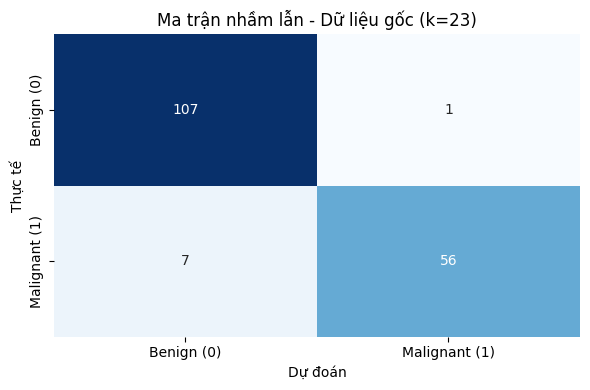

In [79]:
# Phần 1: Dữ liệu gốc
# ------------------------------
print("\n=== Xử lý Dữ liệu gốc ===")
# Chia dữ liệu gốc với tỷ lệ test_size=0.3 (70% huấn luyện, 30% kiểm tra)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện và đánh giá KNN trên dữ liệu gốc
f1_orig = train_evaluate_knn(X_train_orig, X_test_orig, y_train_orig, y_test_orig, "Dữ liệu gốc", k=k)
f1_scores['Dữ liệu gốc'] = f1_orig



=== Xử lý Dữ liệu PCA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       108
           1       0.97      0.89      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

 F1-score: 0.9469


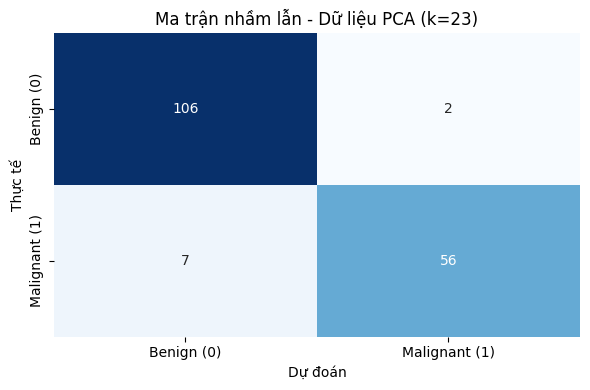

In [80]:
# Phần 2: Dữ liệu PCA
print("\n=== Xử lý Dữ liệu PCA ===")

# Huấn luyện và đánh giá KNN trên dữ liệu PCA
f1_pca = train_evaluate_knn(X_train_pca_95, X_test_pca_95, y_train, y_test, "Dữ liệu PCA", k=k)
f1_scores['Dữ liệu PCA'] = f1_pca



=== Xử lý Dữ liệu LDA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

 F1-score: 0.9591


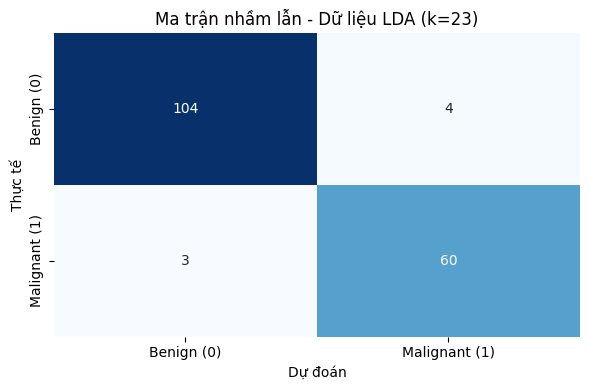

In [81]:
# Phần 3: Dữ liệu LDA
# ------------------------------
print("\n=== Xử lý Dữ liệu LDA ===")

# Huấn luyện và đánh giá KNN trên dữ liệu LDA
f1_lda = train_evaluate_knn(X_train_lda, X_test_lda, y_train, y_test, "Dữ liệu LDA", k=k)
f1_scores['Dữ liệu LDA'] = f1_lda


    Vẽ biểu đồ cột so sánh  F1-score của các tập dữ liệu.

    f1_scores: Chứa tên tập dữ liệu và F1-score.


In [82]:
# Hàm vẽ biểu đồ hiệu suất
def plot_performance(f1_scores):
    datasets = list(f1_scores.keys())
    scores = list(f1_scores.values())

    plt.figure(figsize=(8, 6))
    bars = plt.bar(datasets, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

    # Thêm giá trị trên đầu mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}',
                 ha='center', va='bottom', fontsize=10)

    plt.title('So sánh Weighted F1-score giữa các tập dữ liệu', fontsize=12)
    plt.xlabel('Tập dữ liệu', fontsize=10)
    plt.ylabel('Weighted F1-score', fontsize=10)
    plt.ylim(0, 1.1)  # Đặt giới hạn trục y để dễ nhìn
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



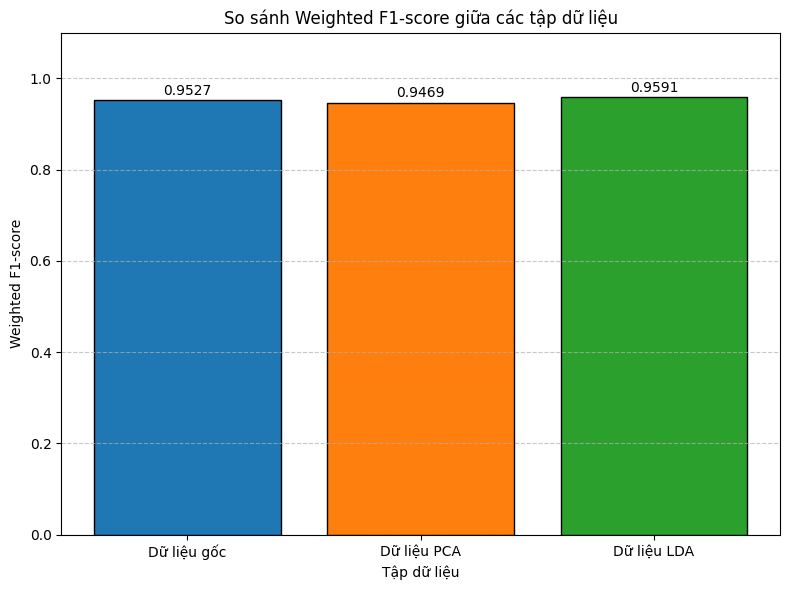

In [83]:
# Vẽ biểu đồ hiệu suất
plot_performance(f1_scores)

In [84]:
import joblib
from sklearn.neighbors import KNeighborsClassifier

def save_knn_model(X_train, y_train, output_path, k=23):
    """
    Huấn luyện và lưu mô hình KNN vào tệp .joblib.

    Parameters:
    - X_train: Dữ liệu huấn luyện.
    - y_train: Nhãn huấn luyện.
    - output_path: Đường dẫn để lưu tệp .joblib.
    - k: Số hàng xóm (mặc định là 23).
    """
    # Khởi tạo và huấn luyện mô hình KNN
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
    knn.fit(X_train, y_train)

    # Lưu mô hình vào tệp .joblib
    joblib.dump(knn, output_path)
    print(f"Mô hình KNN đã được lưu tại: {output_path}")

# Lưu mô hình cho dữ liệu gốc
save_knn_model(X_train_scaled, y_train_orig, '../models/knn/knn_original.joblib')

# Lưu mô hình cho dữ liệu PCA
save_knn_model(X_train_pca_95, y_train, '../models/knn/knn_pca.joblib')

# Lưu mô hình cho dữ liệu LDA
save_knn_model(X_train_lda, y_train, '../models/knn/knn_lda.joblib')

Mô hình KNN đã được lưu tại: ../models/knn/knn_original.joblib
Mô hình KNN đã được lưu tại: ../models/knn/knn_pca.joblib
Mô hình KNN đã được lưu tại: ../models/knn/knn_lda.joblib


## 2. Logistic Regression

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import joblib

import warnings
warnings.filterwarnings('ignore')

In [86]:
# Hàm huấn luyện, đánh giá và lưu mô hình Logistic Regression
def train_evaluate_logistic(X_train, X_test, y_train, y_test, dataset_name, output_path):
    """
    Huấn luyện, đánh giá và lưu mô hình Logistic Regression.

    Parameters:
    - X_train, X_test: Dữ liệu huấn luyện và kiểm tra.
    - y_train, y_test: Nhãn huấn luyện và kiểm tra.
    - dataset_name: Tên tập dữ liệu (ví dụ: 'Dữ liệu gốc', 'PCA', 'LDA').
    - output_path: Đường dẫn để lưu tệp .joblib.
    """
    # Khởi tạo và huấn luyện mô hình Logistic Regression
    lr = LogisticRegression(random_state=42, max_iter=1000)
    lr.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = lr.predict(X_test)

    # In kết quả
    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))

    # Tính và in weighted F1-score
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"F1-score: {test_f1:.4f}")

    # Vẽ ma trận nhầm lẫn
    plot_confusion_matrix(y_test, y_pred, f"Ma trận nhầm lẫn - {dataset_name}")

    # Lưu mô hình
    joblib.dump(lr, output_path)

    return test_f1


=== Xử lý Dữ liệu gốc ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

F1-score: 0.9825


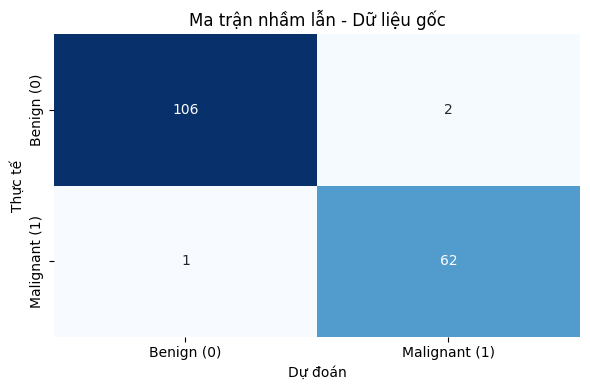


=== Xử lý Dữ liệu PCA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       108
           1       1.00      0.98      0.99        63

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

F1-score: 0.9941


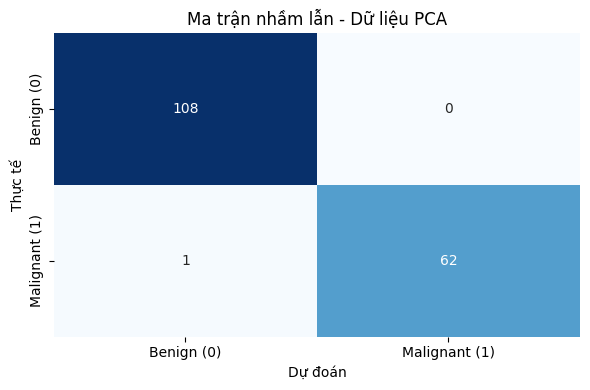


=== Xử lý Dữ liệu LDA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

F1-score: 0.9591


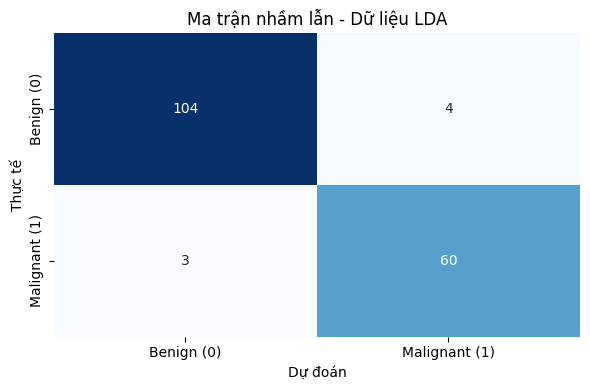

In [87]:
# Danh sách để lưu F1-score
f1_scores_lr = {}

# Phần 1: Dữ liệu gốc
print("\n=== Xử lý Dữ liệu gốc ===")
f1_orig_lr = train_evaluate_logistic(X_train_scaled, X_test_scaled, y_train_orig, y_test_orig, 
                                    "Dữ liệu gốc", "../models/log_reg/lr_original.joblib")
f1_scores_lr['Dữ liệu gốc'] = f1_orig_lr

# Phần 2: Dữ liệu PCA
print("\n=== Xử lý Dữ liệu PCA ===")
f1_pca_lr = train_evaluate_logistic(X_train_pca_95, X_test_pca_95, y_train, y_test, 
                                   "Dữ liệu PCA", "../models/log_reg/lr_pca.joblib")
f1_scores_lr['Dữ liệu PCA'] = f1_pca_lr

# Phần 3: Dữ liệu LDA
print("\n=== Xử lý Dữ liệu LDA ===")
f1_lda_lr = train_evaluate_logistic(X_train_lda, X_test_lda, y_train, y_test, 
                                   "Dữ liệu LDA", "../models/log_reg/lr_lda.joblib")
f1_scores_lr['Dữ liệu LDA'] = f1_lda_lr

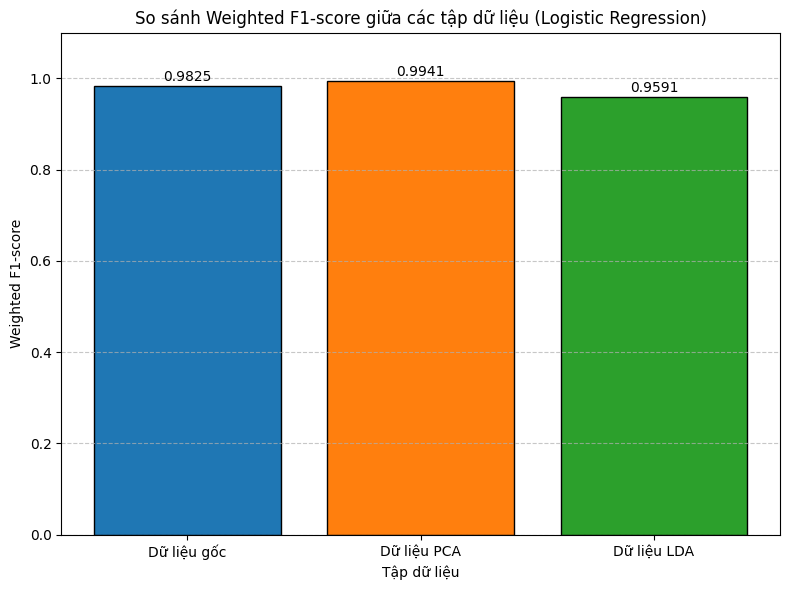

In [88]:
# Hàm vẽ biểu đồ hiệu suất 
def plot_performance(f1_scores):
    datasets = list(f1_scores.keys())
    scores = list(f1_scores.values())

    plt.figure(figsize=(8, 6))
    bars = plt.bar(datasets, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')

    # Thêm giá trị trên đầu mỗi cột
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f'{yval:.4f}',
                 ha='center', va='bottom', fontsize=10)

    plt.title('So sánh Weighted F1-score giữa các tập dữ liệu (Logistic Regression)', fontsize=12)
    plt.xlabel('Tập dữ liệu', fontsize=10)
    plt.ylabel('Weighted F1-score', fontsize=10)
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Vẽ biểu đồ hiệu suất
plot_performance(f1_scores_lr)

## 3. SVM


=== Xử lý Dữ liệu gốc ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

 F1-score: 0.9648
 accuracy: 0.9649


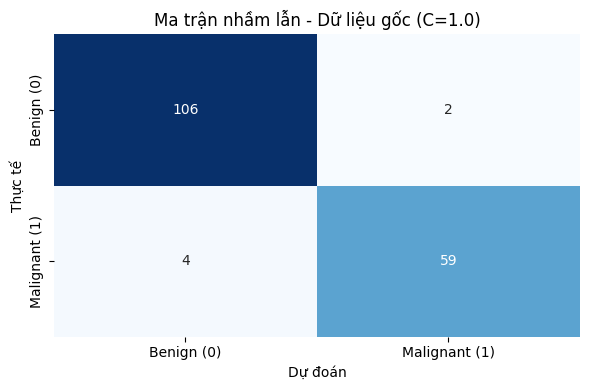


=== Xử lý Dữ liệu PCA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

 F1-score: 0.9883
 accuracy: 0.9883


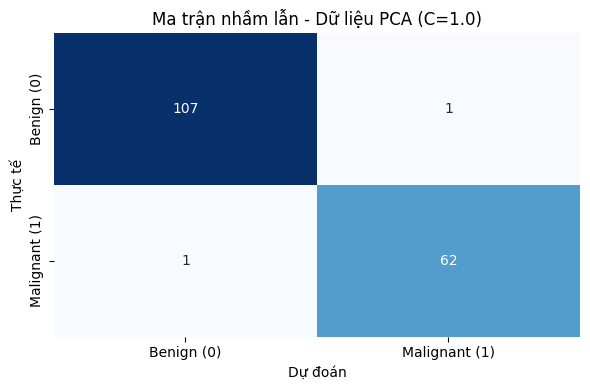


=== Xử lý Dữ liệu LDA ===

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

 F1-score: 0.9591
 accuracy: 0.9591


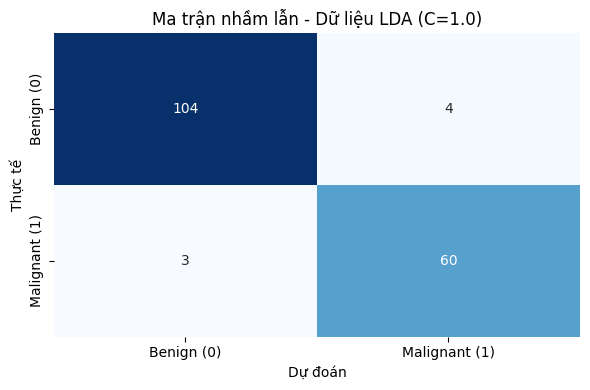

In [89]:
# Thư viện cần thiết
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC  
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(y_true, y_pred, title):
    """
    Vẽ ma trận nhầm lẫn sử dụng seaborn heatmap.
    Parameters:
    - y_true: Nhãn thực tế.
    - y_pred: Nhãn dự đoán.
    - title: Tiêu đề của biểu đồ.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Benign (0)', 'Malignant (1)'],
                yticklabels=['Benign (0)', 'Malignant (1)'])
    plt.title(title)
    plt.xlabel('Dự đoán')
    plt.ylabel('Thực tế')
    plt.tight_layout()
    plt.show()

# Hàm huấn luyện và đánh giá mô hình SVM
def train_evaluate_svm(X_train, X_test, y_train, y_test, dataset_name, C=1.0):
    # Khởi tạo mô hình SVM với kernel tuyến tính
    svm = SVC(C=C, kernel='linear', random_state=42)
    svm.fit(X_train, y_train)

    # Dự đoán trên tập kiểm tra
    y_pred = svm.predict(X_test)

    # In kết quả
    print("\nBáo cáo phân loại:")
    print(classification_report(y_test, y_pred))

    # Tính và in weighted F1-score
    test_f1 = f1_score(y_test, y_pred, average='weighted')
    test_accuracy = accuracy_score(y_test, y_pred)
    print(f" F1-score: {test_f1:.4f}")
    print(f" accuracy: {test_accuracy:.4f}")

    # Vẽ ma trận nhầm lẫn
    plot_confusion_matrix(y_test, y_pred, f"Ma trận nhầm lẫn - {dataset_name} (C={C})")

    return test_f1,test_accuracy



# Danh sách để lưu F1-score
f1_scores = {}

# Phần 1: Dữ liệu gốc
# ---------------train_evaluate_svm---------------
print("\n=== Xử lý Dữ liệu gốc ===")
# Chia dữ liệu gốc với tỷ lệ test_size=0.3 (70% huấn luyện, 30% kiểm tra)
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(X, y, test_size=0.3, random_state=42)

# Huấn luyện và đánh giá SVM trên dữ liệu gốc
f1_orig = train_evaluate_svm(X_train_orig, X_test_orig, y_train_orig, y_test_orig, "Dữ liệu gốc", C=1.0)
f1_scores['Dữ liệu gốc'] = f1_orig

# Phần 2: Dữ liệu PCA
# ------------------------------
print("\n=== Xử lý Dữ liệu PCA ===")
# Huấn luyện và đánh giá SVM trên dữ liệu PCA
f1_pca = train_evaluate_svm(X_train_pca_95, X_test_pca_95, y_train, y_test, "Dữ liệu PCA", C=1.0)
f1_scores['Dữ liệu PCA'] = f1_pca

# Phần 3: Dữ liệu LDA
# ------------------------------
print("\n=== Xử lý Dữ liệu LDA ===")
# Huấn luyện và đánh giá SVM trên dữ liệu LDA
f1_lda = train_evaluate_svm(X_train_lda, X_test_lda, y_train, y_test, "Dữ liệu LDA", C=1.0)
f1_scores['Dữ liệu LDA'] = f1_lda

# Hàm vẽ biểu đồ hiệu suất
def plot_performance(f1_scores):
    datasets = list(f1_scores.keys())
    scores = list(f1_scores.values())

    # Tạo biểu đồ cột
  
    {
        "type": "bar",
        "data": {
            "labels": ["Dữ liệu gốc", "Dữ liệu PCA", "Dữ liệu LDA"],
            "datasets": [{
                "label": "Weighted F1-score",
                "data": [scores[0], scores[1], scores[2]],
                "backgroundColor": ["#1f77b4", "#ff7f0e", "#2ca02c"],
                "borderColor": ["#1f77b4", "#ff7f0e", "#2ca02c"],
                "borderWidth": 1
            }]
        },
        "options": {
            "plugins": {
                "title": {
                    "display": true,
                    "text": "So sánh Weighted F1-score giữa các tập dữ liệu",
                    "font": {"size": 12}
                },
                "legend": {"display": false}
            },
            "scales": {
                "y": {
                    "beginAtZero": true,
                    "max": 1.1,
                    "title": {"display": true, "text": "Weighted F1-score"},
                    "grid": {"display": true, "drawBorder": false}
                },
                "x": {
                    "title": {"display": true, "text": "Tập dữ liệu"}
                }
            },
            "animation": false
        }
    }

    

# **PHẦN 4: K-MEANS PHÂN CỤM & PHÂN LOẠI 3 NHÃN**

**Ý tưởng chính của phần này sẽ bao gồm việc chúng ta sẽ phân dữ liệu thành 3 cụm thay vì 2 cụm đã được gán nhán trước đó của label. Từ đó ta sẽ gán mỗi điểm trong 3 cụm một label tương ứng với cụm chứa nó (0|1|2)**

In [90]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# --- 1) Chuẩn bị dữ liệu cho K-means ---
# Ta đã có:
#   X_train_scaled, X_test_scaled: dữ liệu đã chuẩn hóa (StandardScaler) cho train và test
# => Chúng ta cần gom X_train_scaled và X_test_scaled lại thành một mảng duy nhất để chạy KMeans
X_all_scaled = np.vstack((X_train_scaled, X_test_scaled))

# --- 2) Khởi tạo và huấn luyện KMeans với 3 cụm ---
kmeans = KMeans(n_clusters=3, random_state=42)
labels_all = kmeans.fit_predict(X_all_scaled)

# --- 3) Tách nhãn cluster thành y_cluster_train và y_cluster_test ---
n_train = X_train_scaled.shape[0]
y_cluster_train = labels_all[:n_train]
y_cluster_test  = labels_all[n_train:]

# In ra số lượng mẫu trong mỗi cluster để kiểm tra
print("\nSố lượng mẫu ở từng cluster (toàn bộ dữ liệu):")
unique, counts = np.unique(labels_all, return_counts=True)
for clu, cnt in zip(unique, counts):
    print(f"Cluster {clu}: {cnt} mẫu")



Số lượng mẫu ở từng cluster (toàn bộ dữ liệu):
Cluster 0: 121 mẫu
Cluster 1: 352 mẫu
Cluster 2: 96 mẫu


**TRỰC QUAN HÓA 3 CỤM BẰNG PCA**

k=2: Silhouette Score = 0.3421


k=3: Silhouette Score = 0.3135
k=4: Silhouette Score = 0.1583
k=5: Silhouette Score = 0.1611
k=6: Silhouette Score = 0.1440

=== Trực quan hóa bằng PCA ===


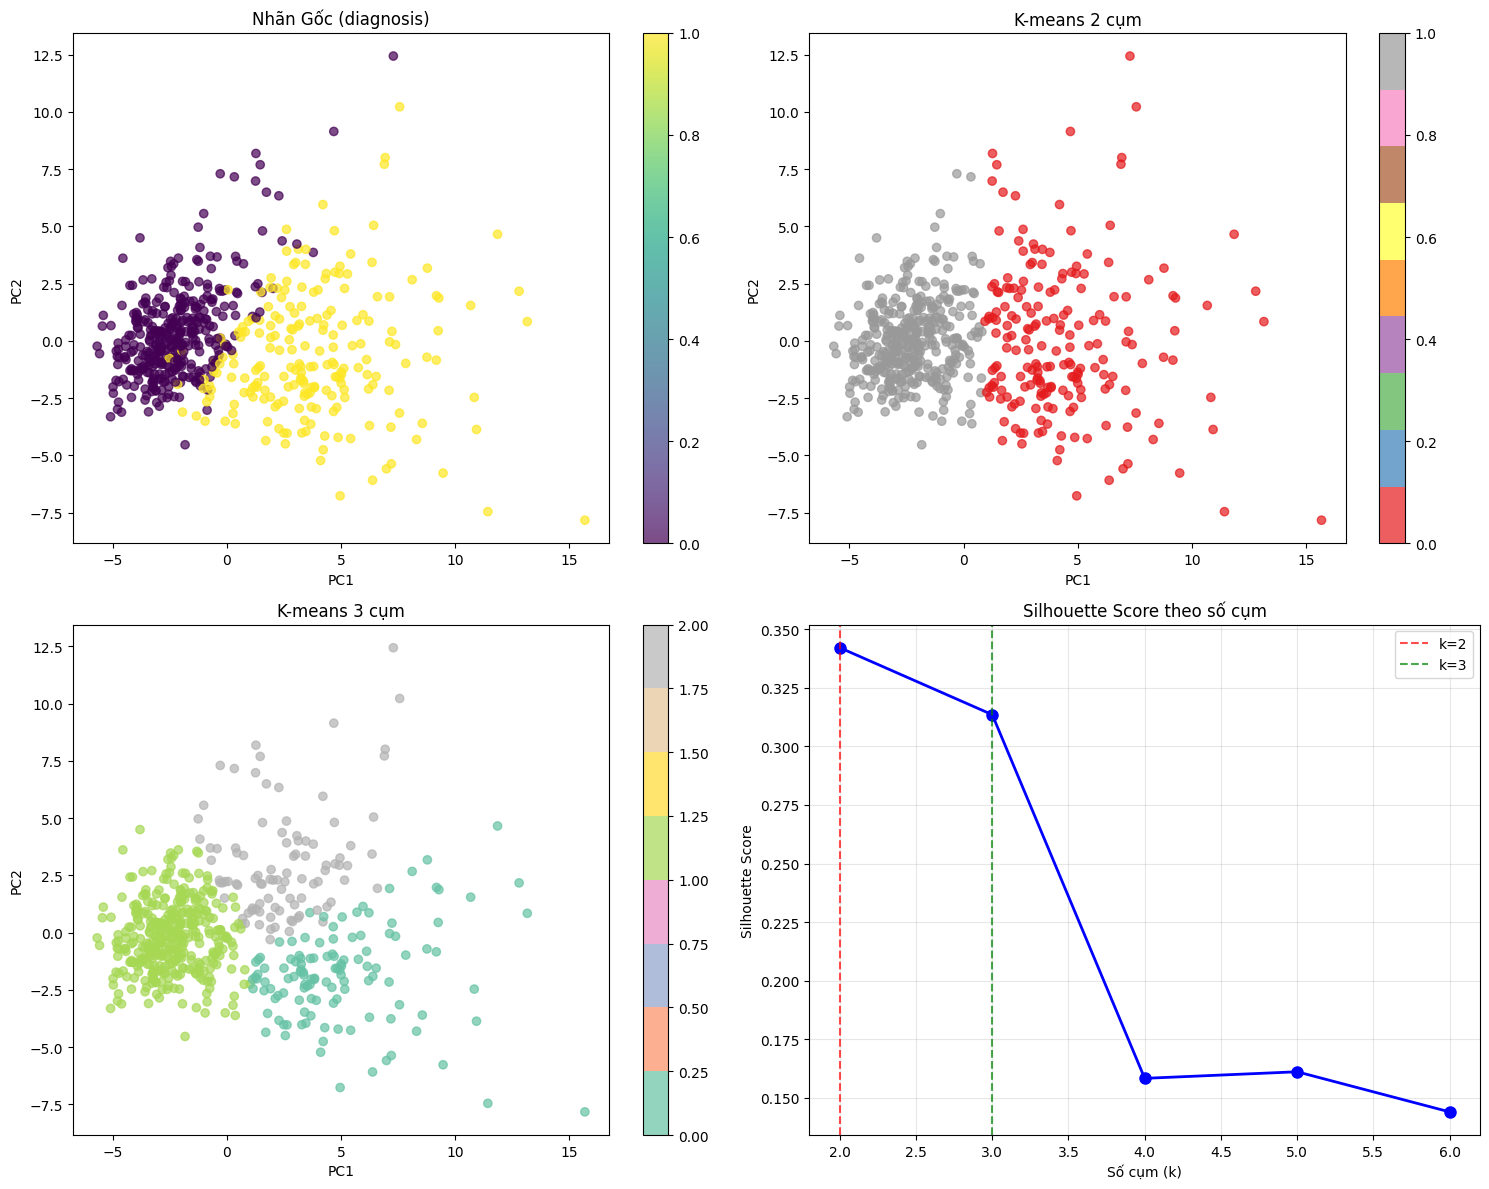

k=2: Davies-Bouldin Index = 1.3171
k=3: Davies-Bouldin Index = 1.5601
k=4: Davies-Bouldin Index = 1.8891
k=5: Davies-Bouldin Index = 1.7621
k=6: Davies-Bouldin Index = 1.6785


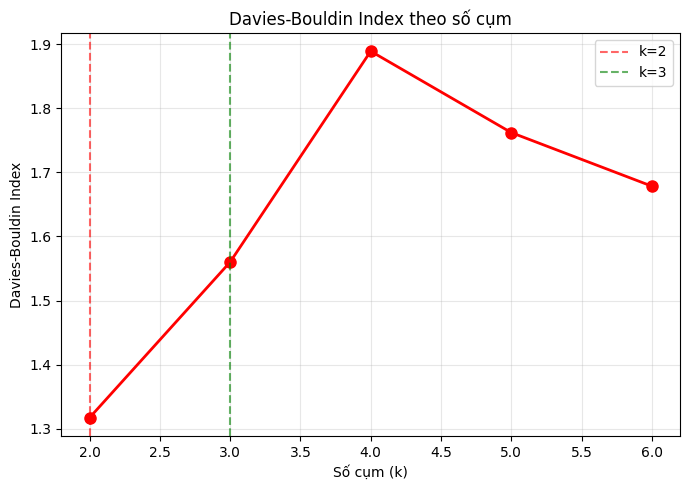

In [91]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Nối train và test lại (để clustering trên toàn bộ dữ liệu)
X_scaled = np.vstack([X_train_scaled, X_test_scaled])
y_all = pd.concat([y_train, y_test], axis=0).values

# ==========================
# 1. K-means với 2 cụm
kmeans_2 = KMeans(n_clusters=2, init='k-means++', random_state=42)
clusters_2 = kmeans_2.fit_predict(X_scaled)
silhouette_2 = silhouette_score(X_scaled, clusters_2)
print(f"k=2: Silhouette Score = {silhouette_2:.4f}")


# ==========================
# 2. K-means với 3 cụm
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters_3 = kmeans_3.fit_predict(X_scaled)
silhouette_3 = silhouette_score(X_scaled, clusters_3)
print(f"k=3: Silhouette Score = {silhouette_3:.4f}")

# Gán tên cho 3 cụm
cluster_names = {0: 'Nhóm_A', 1: 'Nhóm_B', 2: 'Nhóm_C'}
clusters_3_labels = [cluster_names[c] for c in clusters_3]

# ==========================
# 3. Trực quan hóa kết quả bằng PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Nhãn gốc
scatter_orig = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_all, cmap='viridis', alpha=0.7)
axes[0, 0].set_title('Nhãn Gốc (diagnosis)')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')
plt.colorbar(scatter_orig, ax=axes[0, 0])

# K-means 2 cụm
scatter_k2 = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_2, cmap='Set1', alpha=0.7)
axes[0, 1].set_title('K-means 2 cụm')
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')
plt.colorbar(scatter_k2, ax=axes[0, 1])

# K-means 3 cụm
scatter_k3 = axes[1, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_3, cmap='Set2', alpha=0.7)
axes[1, 0].set_title('K-means 3 cụm')
axes[1, 0].set_xlabel('PC1')
axes[1, 0].set_ylabel('PC2')
plt.colorbar(scatter_k3, ax=axes[1, 0])

# Silhouette score theo số cụm k=2..6
k_range = [2, 3, 4, 5, 6]
sil_scores = [silhouette_2, silhouette_3]

for k in [4, 5, 6]:
    kmeans_k = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters_k = kmeans_k.fit_predict(X_scaled)
    sil_k = silhouette_score(X_scaled, clusters_k)
    sil_scores.append(sil_k)
    print(f"k={k}: Silhouette Score = {sil_k:.4f}")
    
print("\n=== Trực quan hóa bằng PCA ===")
axes[1, 1].plot(k_range, sil_scores, 'bo-', linewidth=2, markersize=8)
axes[1, 1].axvline(x=2, color='red', linestyle='--', alpha=0.7, label='k=2')
axes[1, 1].axvline(x=3, color='green', linestyle='--', alpha=0.7, label='k=3')
axes[1, 1].set_xlabel('Số cụm (k)')
axes[1, 1].set_ylabel('Silhouette Score')
axes[1, 1].set_title('Silhouette Score theo số cụm')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# --- Bổ sung biểu đồ DBI ---
dbi_scores = [] 

for k in [2, 3, 4, 5, 6]:
    kmeans_k = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters_k = kmeans_k.fit_predict(X_scaled)
    
    # sil_k = silhouette_score(X_scaled, clusters_k)
    dbi_k = davies_bouldin_score(X_scaled, clusters_k)
    
    sil_scores.append(sil_k)
    dbi_scores.append(dbi_k)

    # print(f"k={k}: Silhouette Score = {sil_k:.4f}")
    print(f"k={k}: Davies-Bouldin Index = {dbi_k:.4f}")

plt.figure(figsize=(7, 5))
plt.plot(k_range, dbi_scores, 'ro-', linewidth=2, markersize=8)
plt.axvline(x=2, color='red', linestyle='--', alpha=0.6, label='k=2')
plt.axvline(x=3, color='green', linestyle='--', alpha=0.6, label='k=3')
plt.xlabel('Số cụm (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index theo số cụm')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()


**Huấn luyện và đánh giá mô hình**


=== MÔ HÌNH 1: Softmax Regression (Logistic Multinomial) ===


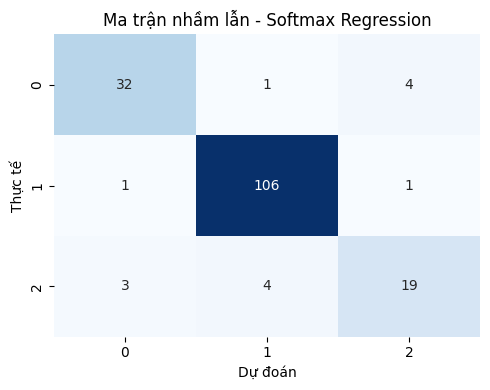


Softmax PCA: Accuracy = 0.9883


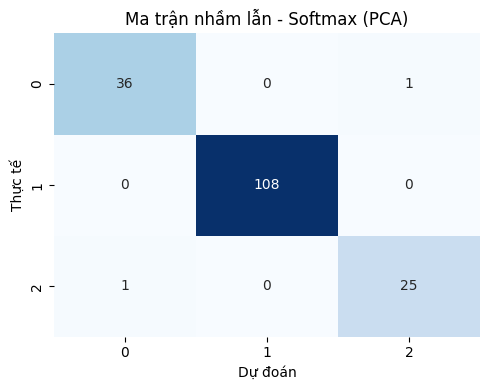


Softmax LDA: Accuracy = 0.9181


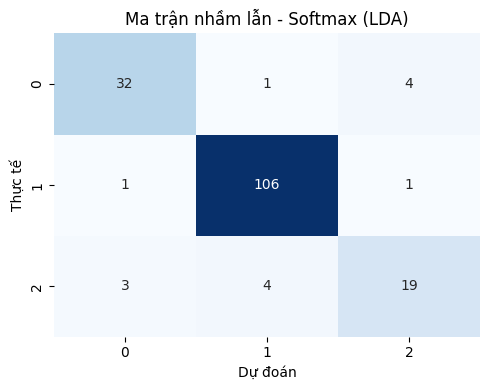

In [92]:
from sklearn.svm import SVC

# --- Huấn luyện và đánh giá mô hình phân loại 3 lớp trên X_train_scaled / X_test_scaled ---
def plot_cm(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel("Dự đoán")
    plt.ylabel("Thực tế")
    plt.title(title)
    plt.tight_layout()
    plt.show()

# LDA cho bài toán 3 nhãn (KMeans)
lda_3 = LDA(n_components=2)
X_train_lda3 = lda_3.fit_transform(X_train_scaled, y_cluster_train)
X_test_lda3 = lda_3.transform(X_test_scaled)

# 4.2. Softmax Regression (Logistic Regression đa lớp)
softmax_clf = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
softmax_clf.fit(X_train_lda3, y_cluster_train)
y_pred_sm = softmax_clf.predict(X_test_lda3)

acc_sm = accuracy_score(y_cluster_test, y_pred_sm)



# --- Vẽ ma trận nhầm lẫn cho Softmax ---
print("\n=== MÔ HÌNH 1: Softmax Regression (Logistic Multinomial) ===")
cm_softmax = confusion_matrix(y_cluster_test, y_pred_sm)
plot_cm(cm_softmax, "Ma trận nhầm lẫn - Softmax Regression")



# --- PHẦN BỔ SUNG: Huấn luyện trên dữ liệu PCA và LDA ---

# 4.4. Softmax Regression trên dữ liệu PCA
softmax_pca = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
softmax_pca.fit(X_train_pca_95, y_cluster_train)
y_pred_sm_pca = softmax_pca.predict(X_test_pca_95)
acc_sm_pca = accuracy_score(y_cluster_test, y_pred_sm_pca)
print(f"\nSoftmax PCA: Accuracy = {acc_sm_pca:.4f}")
cm_softmax_pca = confusion_matrix(y_cluster_test, y_pred_sm_pca)
plot_cm(cm_softmax_pca, "Ma trận nhầm lẫn - Softmax (PCA)")


# 4.6. Softmax Regression trên dữ liệu LDA
softmax_lda = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000,
    random_state=42
)
softmax_lda.fit(X_train_lda3, y_cluster_train)
y_pred_sm_lda = softmax_lda.predict(X_test_lda3)
acc_sm_lda = accuracy_score(y_cluster_test, y_pred_sm_lda)
print(f"\nSoftmax LDA: Accuracy = {acc_sm_lda:.4f}")
cm_softmax_lda = confusion_matrix(y_cluster_test, y_pred_sm_lda)
plot_cm(cm_softmax_lda, "Ma trận nhầm lẫn - Softmax (LDA)")



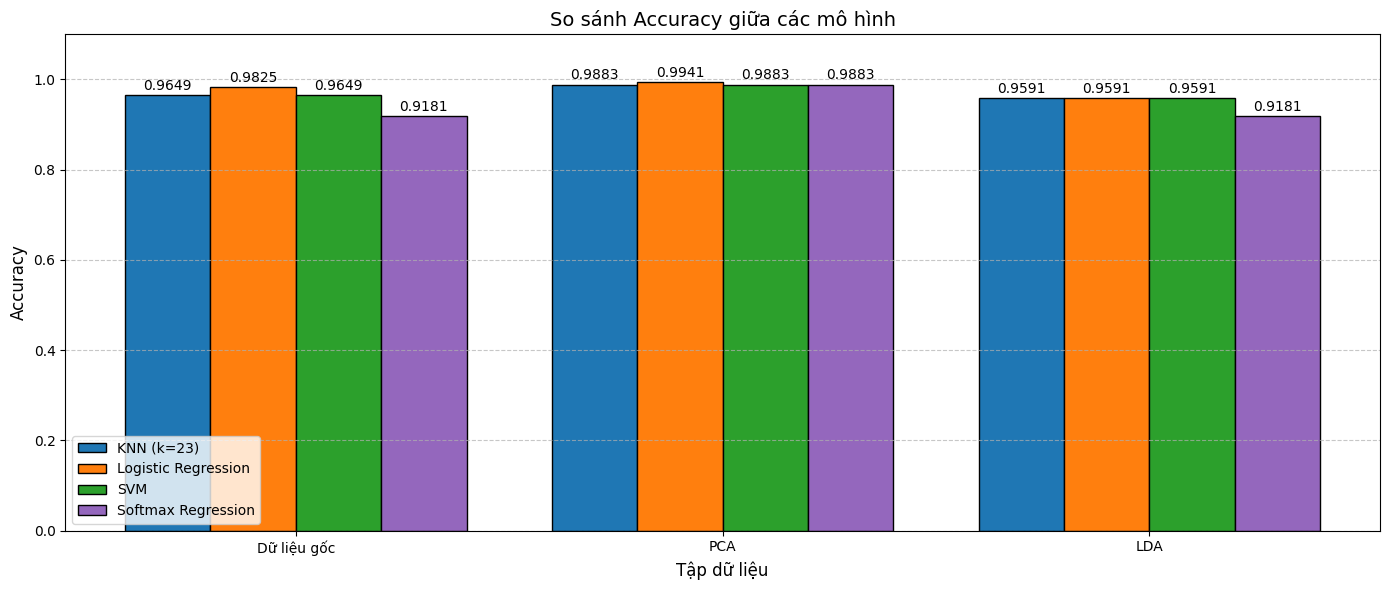

In [95]:
# Định nghĩa danh sách tập dữ liệu
datasets = ["Dữ liệu gốc", "PCA", "LDA"]

# Tạo dictionary accuracies và gán giá trị
accuracies = {}

# KNN: lấy accuracy (giá trị thứ 2 trong tuple f1_scores)
accuracies['KNN'] = [f1_scores['Dữ liệu gốc'][1], f1_scores['Dữ liệu PCA'][1], f1_scores['Dữ liệu LDA'][1]]

# Logistic Regression: 
accuracies['Logistic Regression'] = [f1_scores_lr['Dữ liệu gốc'], f1_scores_lr['Dữ liệu PCA'], f1_scores_lr['Dữ liệu LDA']]

# SVM: đã có sẵn các giá trị accuracy
accuracies['SVM'] = [0.9649, 0.9883, 0.9591]

# Softmax: lấy từ các biến acc_sm, acc_sm_pca, acc_sm_lda
accuracies['Softmax'] = [acc_sm, acc_sm_pca, acc_sm_lda]

def plot_accuracy_comparison(knn_accuracies, lr_accuracies, svm_accuracies, softmax_accuracies, datasets):
    """
    Vẽ biểu đồ cột so sánh accuracy giữa KNN, Logistic Regression, SVM và Softmax trên các tập dữ liệu.
    """
    x = np.arange(len(datasets))  # Vị trí các nhóm cột
    width = 0.2  # Độ rộng mỗi cột

    plt.figure(figsize=(14, 6))

    bars_knn = plt.bar(x - 1.5 * width, knn_accuracies, width, label='KNN (k=23)', color='#1f77b4', edgecolor='black')
    bars_lr = plt.bar(x - 0.5 * width, lr_accuracies, width, label='Logistic Regression', color='#ff7f0e', edgecolor='black')
    bars_svm = plt.bar(x + 0.5 * width, svm_accuracies, width, label='SVM', color='#2ca02c', edgecolor='black')
    bars_softmax = plt.bar(x + 1.5 * width, softmax_accuracies, width, label='Softmax Regression', color='#9467bd', edgecolor='black')

    # Thêm giá trị trên đầu mỗi cột
    for bars in [bars_knn, bars_lr, bars_svm, bars_softmax]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.005, f'{yval:.4f}',
                     ha='center', va='bottom', fontsize=10)

    plt.title('So sánh Accuracy giữa các mô hình', fontsize=14)
    plt.xlabel('Tập dữ liệu', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.xticks(x, datasets)
    plt.ylim(0, 1.1)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()
plot_accuracy_comparison(
    accuracies['KNN'],
    accuracies['Logistic Regression'],
    accuracies['SVM'],      
    accuracies['Softmax'],
    datasets
)
datasets = ["Dữ liệu gốc", "PCA", "LDA"]


# **PHẦN 5: CHUYỂN BÀI TOÁN PHÂN LOẠI SANG HỒI QUY**

## Linear Regresion

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# --- Bước 1: Lấy score từ mô hình phân loại ---
# a) Softmax cho xác suất (shape = [n_samples, n_classes])
softmax_scores = softmax_clf.predict_proba(X_train_scaled)[:, 1]  # Dự đoán xác suất lớp 1



# --- Bước 2: Giảm chiều dữ liệu còn 1/3 ---
n_features_reduced = X_train_scaled.shape[1] // 3
pca_reduced = PCA(n_components=n_features_reduced, random_state=42)
X_train_pca_reduced = pca_reduced.fit_transform(X_train_scaled)

# --- Hàm huấn luyện và đánh giá hồi quy ---
def evaluate_regression(X, y_true, name=""):
    results = {}

    # Hồi quy tuyến tính
    linreg = LinearRegression()
    linreg.fit(X, y_true)
    y_pred_lr = linreg.predict(X)
    mse_lr = mean_squared_error(y_true, y_pred_lr)
    r2_lr = r2_score(y_true, y_pred_lr)
    results['LinearRegression'] = (mse_lr, r2_lr)

  

# --- Bước 3: Đánh giá với 2 loại đầu vào ---
# 1) Với score từ Softmax
evaluate_regression(X_train_scaled, softmax_scores, "Softmax - Dữ liệu gốc")
evaluate_regression(X_train_pca_reduced, softmax_scores, "Softmax - PCA 1/3 chiều")



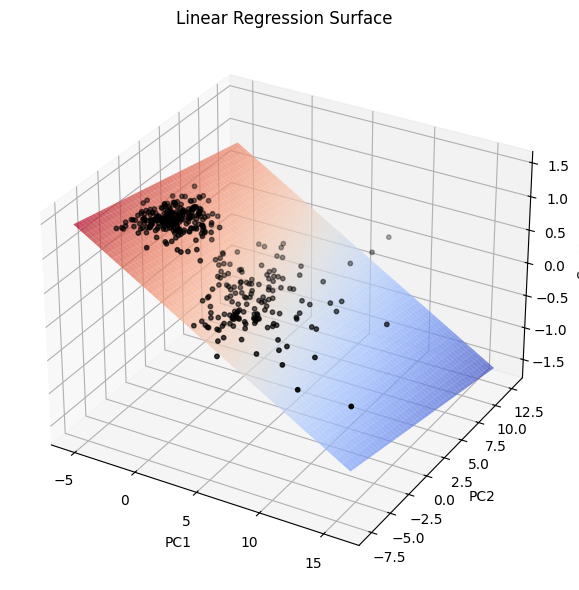

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# --- Giảm chiều về đúng 2 chiều để trực quan ---
pca_2d = PCA(n_components=2, random_state=42)
X_train_2d = pca_2d.fit_transform(X_train_scaled)

# Chọn 1 đầu ra để hồi quy 
y_target = softmax_clf.predict_proba(X_train_scaled)[:, 1]  # Cho Softmax score
# y_target = svm_clf.decision_function(X_train_scaled)[:, 1]  # Hoặc dùng score từ SVM nếu cần

# --- Huấn luyện mô hình hồi quy ---
# 1. Linear Regression
linreg = LinearRegression().fit(X_train_2d, y_target)


# --- Tạo lưới để dự đoán giá trị hồi quy trên mặt phẳng ---
x1_range = np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100)
x2_range = np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)
grid = np.c_[xx1.ravel(), xx2.ravel()]

# Dự đoán giá trị hồi quy trên lưới
z_linreg = linreg.predict(grid).reshape(xx1.shape)
z_svr = svr.predict(grid).reshape(xx1.shape)

# --- Vẽ biểu đồ hồi quy 3D ---
fig = plt.figure(figsize=(16, 6))

# Linear Regression
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(xx1, xx2, z_linreg, cmap='coolwarm', alpha=0.7)
ax1.scatter(X_train_2d[:, 0], X_train_2d[:, 1], y_target, c='black', s=10)
ax1.set_title("Linear Regression Surface")
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('Score')


plt.tight_layout()
plt.show()

## SVM


[Hồi quy SVM] - Dữ liệu gốc
 MSE: 5.2154
 R² : 0.8534


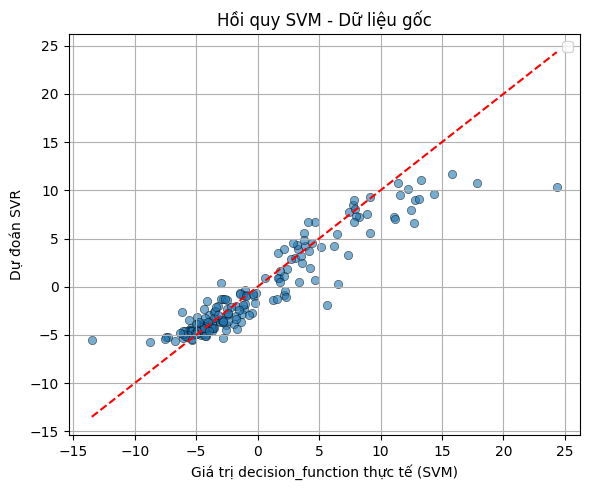


[Hồi quy SVM] - Dữ liệu PCA
 MSE: 6.8768
 R² : 0.8379


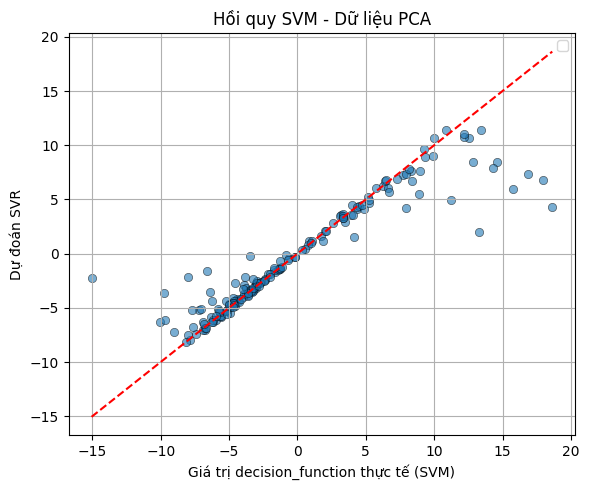


[Hồi quy SVM] - Dữ liệu LDA
 MSE: 2.2245
 R² : 0.9332


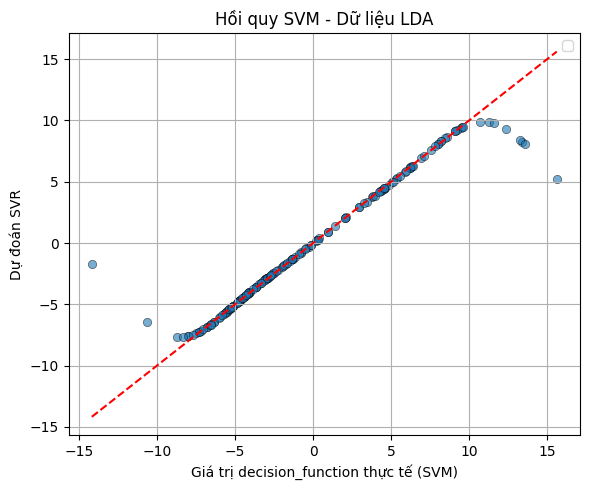

(2.22447864014354, 0.9331739351822894)

In [ ]:
from sklearn.svm import SVC, SVR
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def svm_regression_on_decision_values(X_train, X_test, y_train, y_test, svm_model, dataset_name):
    # Lấy decision_function từ mô hình phân loại
    y_train_score = svm_model.decision_function(X_train)
    y_test_score = svm_model.decision_function(X_test)

    # Hồi quy bằng SVR
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train_score)
    y_pred = svr.predict(X_test)

    # Đánh giá hồi quy
    mse = mean_squared_error(y_test_score, y_pred)
    r2 = r2_score(y_test_score, y_pred)

    print(f"\n[Hồi quy SVM] - {dataset_name}")
    print(f" MSE: {mse:.4f}")
    print(f" R² : {r2:.4f}")

    # Dự đoán nhãn bằng cách ngưỡng hóa dự đoán SVR
    y_pred_class = np.where(y_pred > 0, 1, 0)

     # 4. Vẽ biểu đồ hồi quy
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=y_test_score, y=y_pred, alpha=0.6, edgecolor='k')
    sns.lineplot(x=y_test_score, y=y_test_score, color='red', linestyle='--')
    plt.xlabel("Giá trị decision_function thực tế (SVM)")
    plt.ylabel("Dự đoán SVR")
    plt.title(f"Hồi quy SVM - {dataset_name}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


    return mse, r2
# Dữ liệu gốc
svm_orig = SVC(C=1.0, kernel='linear', random_state=42)
svm_orig.fit(X_train_orig, y_train_orig)
svm_regression_on_decision_values(X_train_orig, X_test_orig, y_train_orig, y_test_orig, svm_orig, "Dữ liệu gốc")

# PCA
svm_pca = SVC(C=1.0, kernel='linear', random_state=42)
svm_pca.fit(X_train_pca_95, y_train)
svm_regression_on_decision_values(X_train_pca_95, X_test_pca_95, y_train, y_test, svm_pca, "Dữ liệu PCA")

# LDA
svm_lda = SVC(C=1.0, kernel='linear', random_state=42)
svm_lda.fit(X_train_lda, y_train)
svm_regression_on_decision_values(X_train_lda, X_test_lda, y_train, y_test, svm_lda, "Dữ liệu LDA")

